In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('combined_sales_data_2025.csv')

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_11483/2911982487.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('combined_sales_data_2025.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243963 entries, 0 to 2243962
Data columns (total 30 columns):
 #   Column              Dtype  
---  ------              -----  
 0   r_n                 int64  
 1   r_ng                int64  
 2   r_nuug              int64  
 3   r_nuu               int64  
 4   cust_no             int64  
 5   periode_first_dist  int64  
 6   is_book             object 
 7   last_type_fu        object 
 8   appl_no             object 
 9   contract_no         int64  
 10  buss_unit           object 
 11  cust_sex            object 
 12  marital_stat        object 
 13  usia                int64  
 14  edu_type            object 
 15  no_of_depend        float64
 16  ocpt_code           int64  
 17  house_stat          object 
 18  cust_kec            object 
 19  cust_kel            object 
 20  cust_prov           object 
 21  salary              float64
 22  obj_brand           object 
 23  obj_tahun           int64  
 24  bpkb_same_name      obje

In [4]:
data.head(10)

,r_n,r_ng,r_nuug,r_nuu,cust_no,periode_first_dist,is_book,last_type_fu,appl_no,contract_no,...,cust_prov,salary,obj_brand,obj_tahun,bpkb_same_name,top,principal,month_inst,grs_dp,data_month
0,1,1,1,1,101000001892,202501,NO_BOOKING,P,11121017913,111002196721,...,PROV BANTEN,4000000.0,HONDA,2021,S,32,35077846,1658000.0,3700000.0,202501
1,1,1,1,1,101000003007,202501,NO_BOOKING,P,12822020211,128002325822,...,Prov DKI Jakarta,10000000.0,HONDA,2022,D,17,21968423,1694000.0,2900000.0,202501
2,1,1,1,1,101000003160,202501,NO_BOOKING,P,16221028438,162001694321,...,PROV DKI JAKARTA,4000000.0,HONDA,2021,S,32,17961116,856000.0,2300000.0,202501
3,1,1,1,1,101000003363,202501,BOOKING,P,15623013746,156002501724,...,Prov DKI Jakarta,8000000.0,HONDA,2020,D,12,10490000,1189000.0,4050000.0,202501
4,1,1,1,1,101000003437,202501,NO_BOOKING,V,10921008862,109000881721,...,Prov Jawa Barat,23000000.0,HONDA,2021,S,33,17458880,793000.0,2700000.0,202501
5,1,1,1,1,101000003617,202501,NO_BOOKING,P,10624015465,106003704924,...,Prov DKI Jakarta,3000000.0,HONDA,2015,S,12,6490000,747000.0,2300000.0,202501
6,1,1,1,1,101000003787,202501,NO_BOOKING,V,15621026794,156001330521,...,PROV DKI JAKARTA,7000000.0,HONDA,2021,D,32,15835802,737000.0,4500000.0,202501
7,1,1,1,1,101000003943,202501,NO_BOOKING,P,12822008376,128000791822,...,PROV DKI JAKARTA,6500000.0,HONDA,2022,S,23,16498064,1007000.0,2900000.0,202501
8,1,1,1,1,101000004624,202501,NO_BOOKING,V,12822023353,128002888122,...,Prov DKI Jakarta,8000000.0,HONDA,2022,D,22,17034035,1050000.0,8000000.0,202501
9,1,1,1,1,101000005367,202501,NO_BOOKING,V,13322000878,133000271122,...,Prov DKI Jakarta,500000.0,HONDA,2022,D,22,15497175,940000.0,8500000.0,202501


In [5]:
data.isnull().sum().sort_values(ascending=False)

last_type_fu          225034
month_inst              7611
cust_prov                205
grs_dp                   155
cust_kel                 122
cust_kec                 122
bpkb_same_name            71
salary                    67
no_of_depend              20
house_stat                 4
ocpt_code                  0
principal                  0
top                        0
obj_tahun                  0
obj_brand                  0
r_n                        0
r_ng                       0
edu_type                   0
usia                       0
marital_stat               0
cust_sex                   0
buss_unit                  0
contract_no                0
appl_no                    0
is_book                    0
periode_first_dist         0
cust_no                    0
r_nuu                      0
r_nuug                     0
data_month                 0
dtype: int64

In [6]:
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


last_type_fu      10.028418
month_inst         0.339177
cust_prov          0.009136
grs_dp             0.006907
cust_kec           0.005437
cust_kel           0.005437
bpkb_same_name     0.003164
salary             0.002986
no_of_depend       0.000891
house_stat         0.000178
dtype: float64

In [7]:
# Distribusi target is_book
data['is_book'].value_counts()

# Distribusi dalam persentase
data['is_book'].value_counts(normalize=True) * 100


is_book
NO_BOOKING    85.709123
BOOKING       14.290877
Name: proportion, dtype: float64

# Exploratory Data Analysis

## A. Analisis Variabel Numerik

In [8]:
num_cols = ['usia', 'salary', 'principal', 'month_inst', 'grs_dp', 'top']

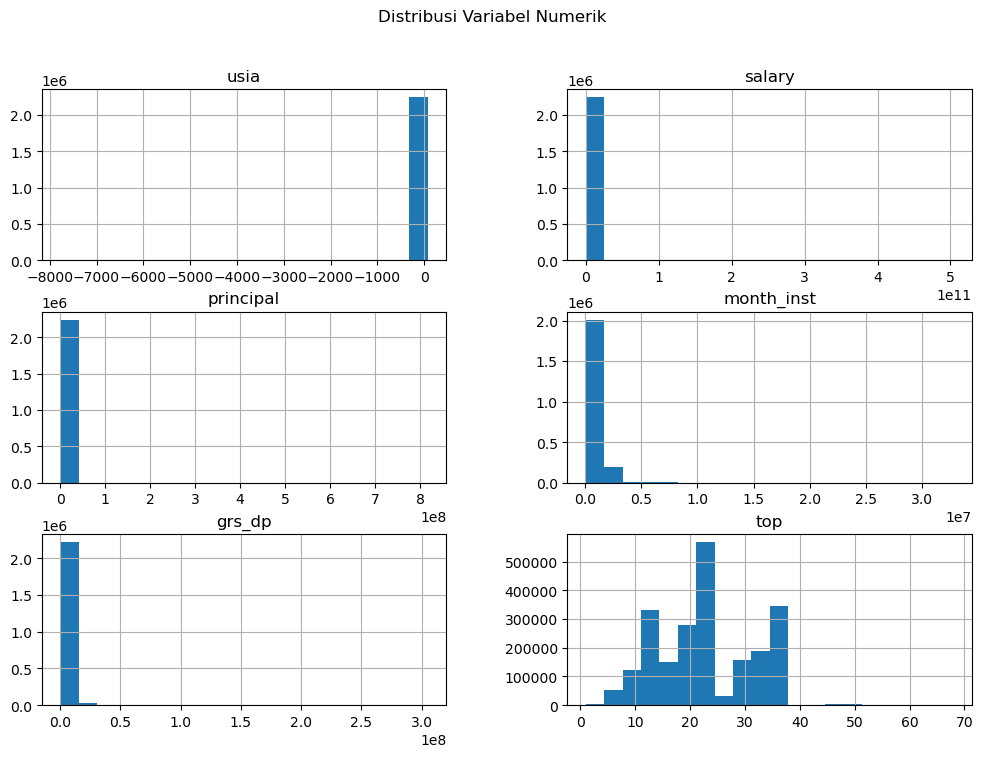

In [9]:
# 1. Histogram
data[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

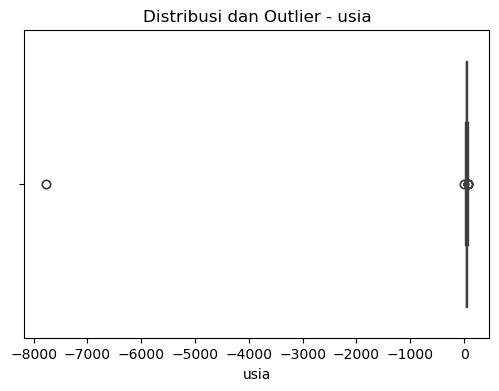

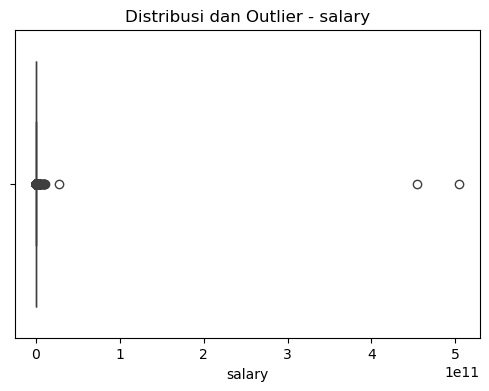

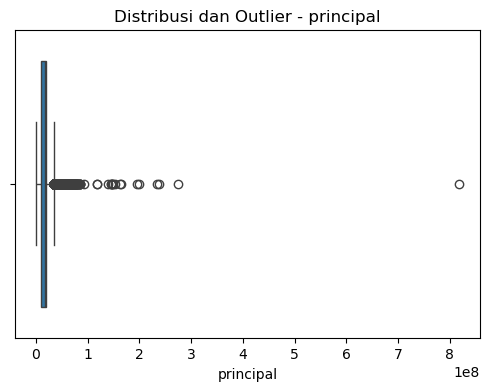

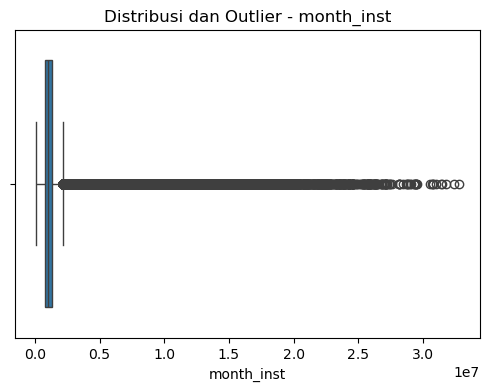

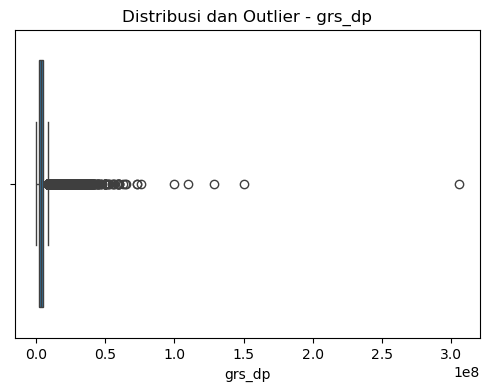

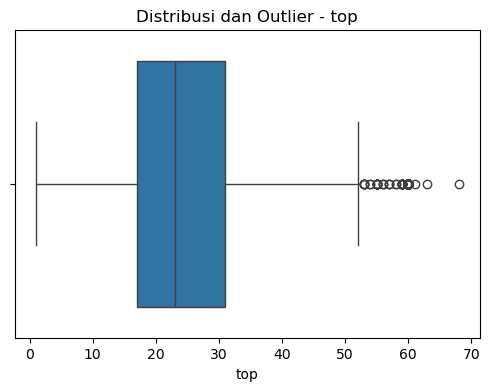

In [10]:
# 2. Boxplot per kolom (cek outlier)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Distribusi dan Outlier - {col}')
    plt.show()

## B. Analisis Variable Kategorikal

In [11]:
cat_cols = ['buss_unit', 'cust_sex', 'marital_stat', 'edu_type', 
            'ocpt_code', 'house_stat', 'obj_brand', 'bpkb_same_name', 
            'last_type_fu']


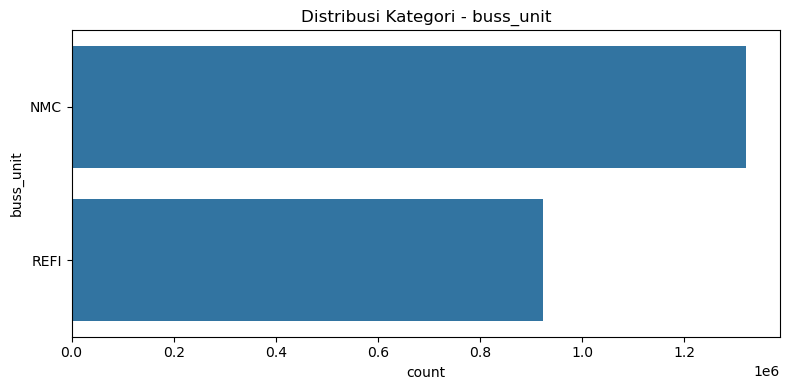

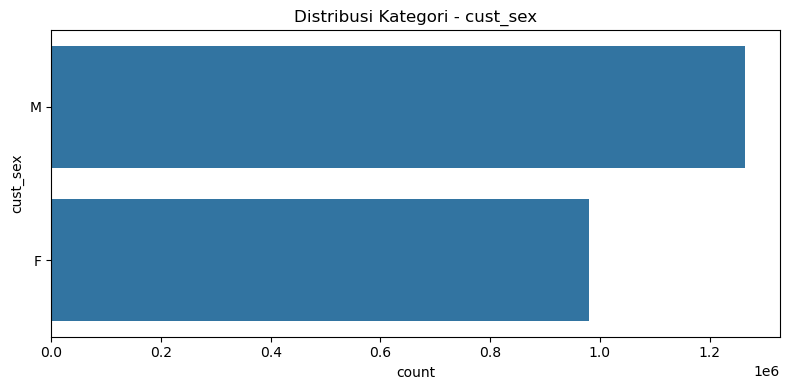

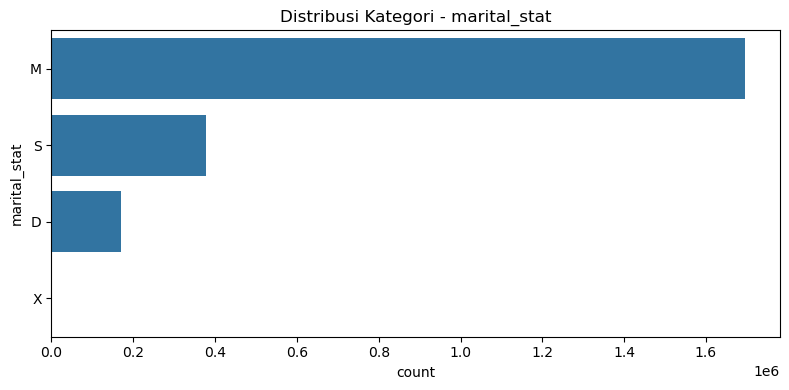

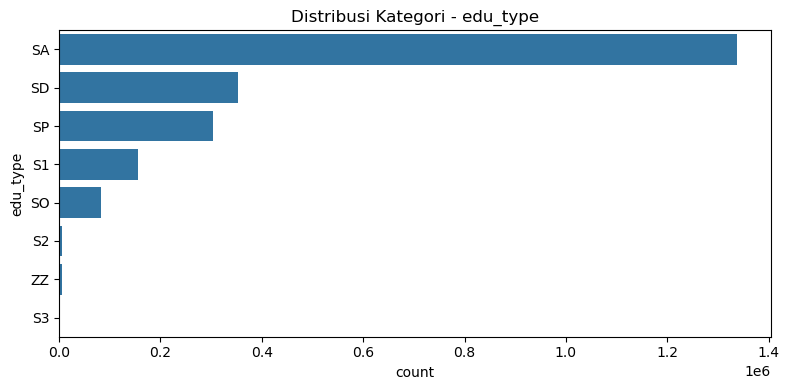

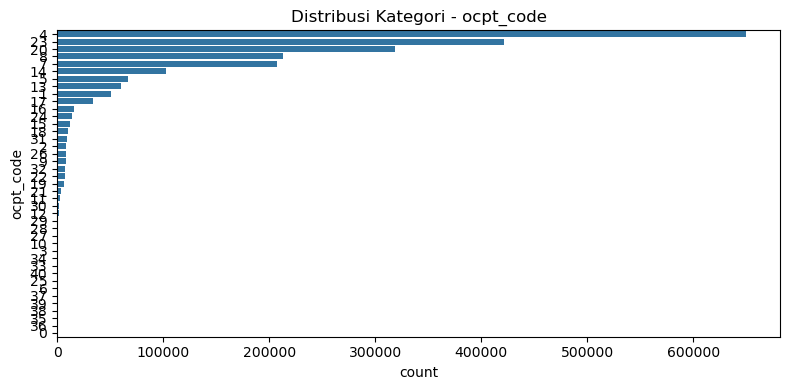

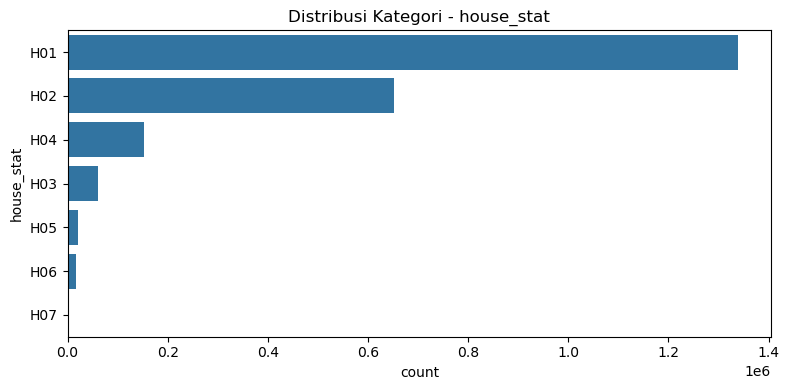

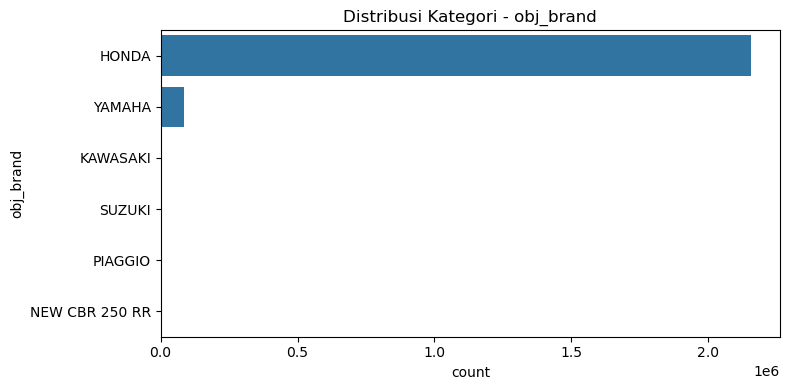

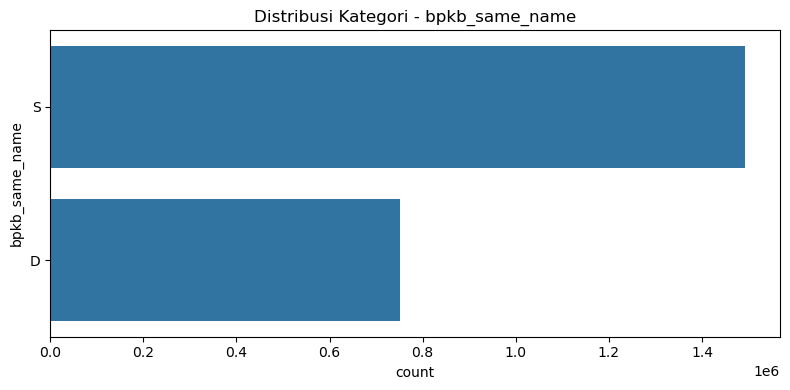

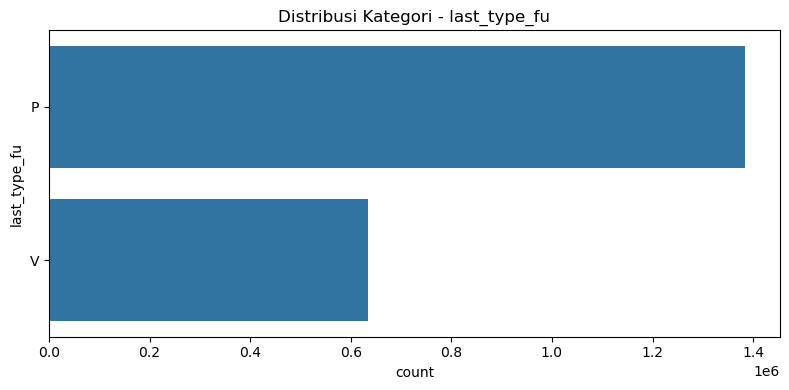

In [12]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Distribusi Kategori - {col}')
    plt.tight_layout()
    plt.show()


## Analisis Numerik vs Target

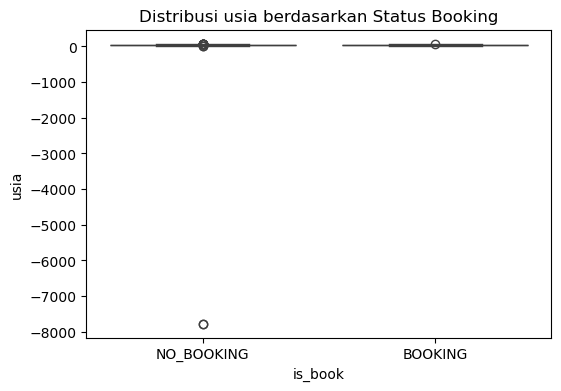

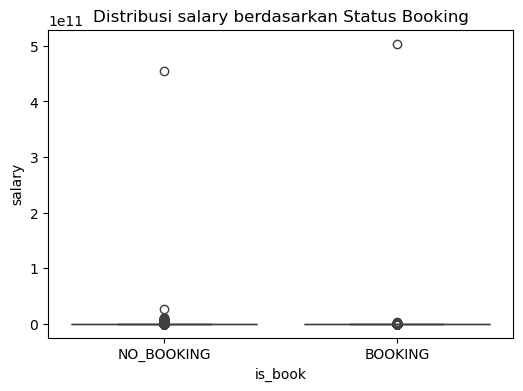

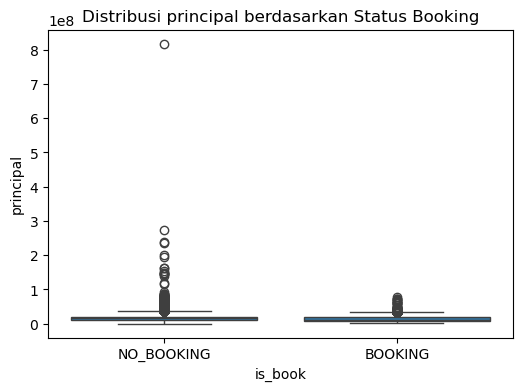

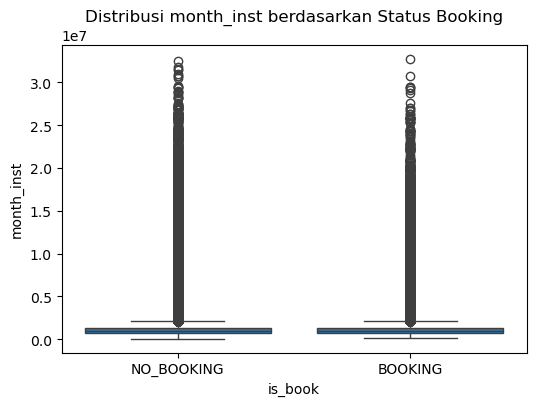

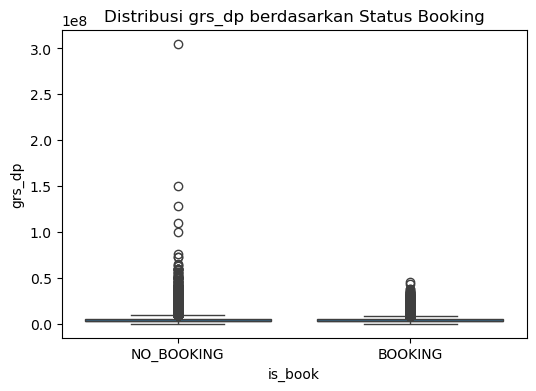

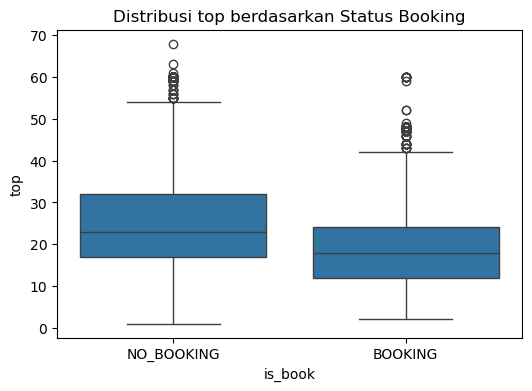

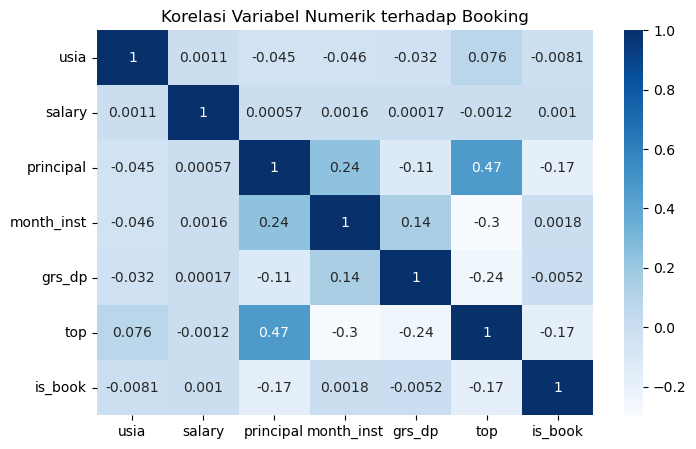

In [13]:
num_cols = ['usia','salary','principal','month_inst','grs_dp','top']

# Boxplot: distribusi numerik berdasarkan status booking
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='is_book', y=col, data=data)
    plt.title(f'Distribusi {col} berdasarkan Status Booking')
    plt.show()

# Korelasi numerik (hanya numerik)
corr = data[num_cols + ['is_book']].copy()
corr['is_book'] = corr['is_book'].map({'NO_BOOKING':0,'BOOKING':1})
plt.figure(figsize=(8,5))
sns.heatmap(corr.corr(), annot=True, cmap='Blues')
plt.title('Korelasi Variabel Numerik terhadap Booking')
plt.show()


## Analisis Kategorikal vs Target

<Figure size 700x400 with 0 Axes>

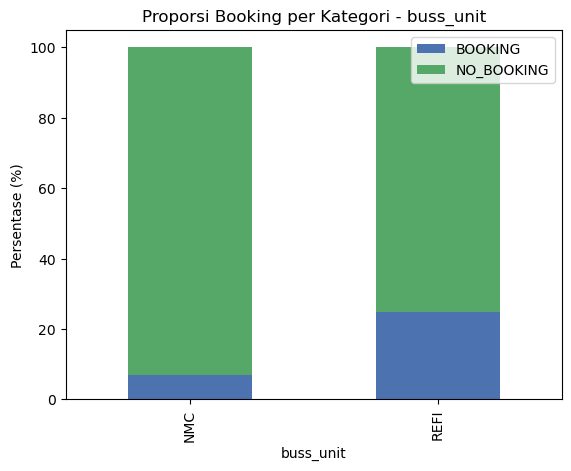

<Figure size 700x400 with 0 Axes>

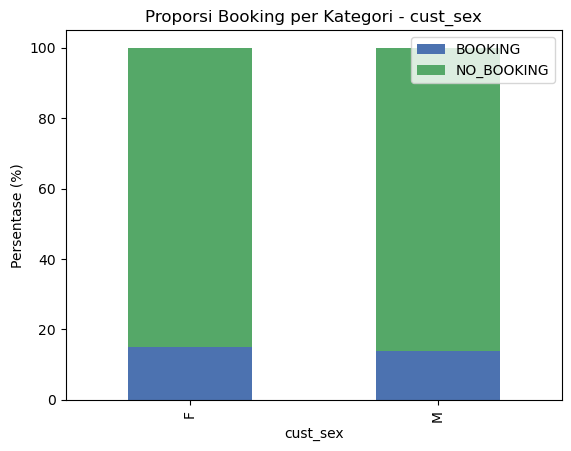

<Figure size 700x400 with 0 Axes>

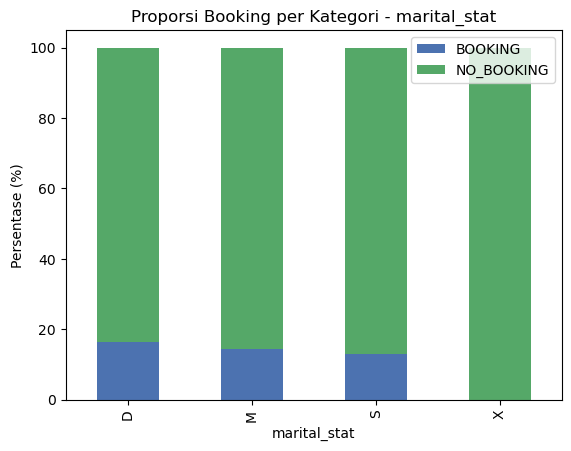

<Figure size 700x400 with 0 Axes>

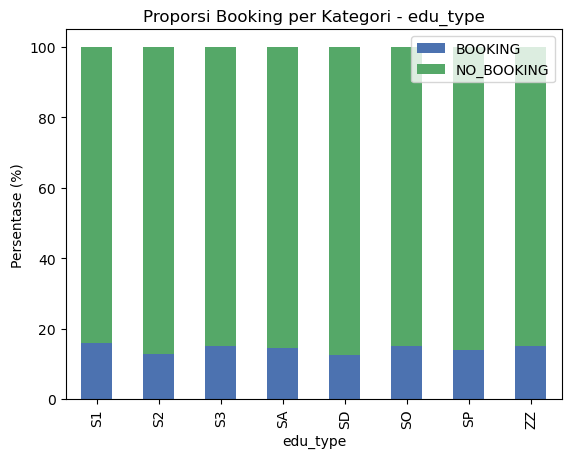

<Figure size 700x400 with 0 Axes>

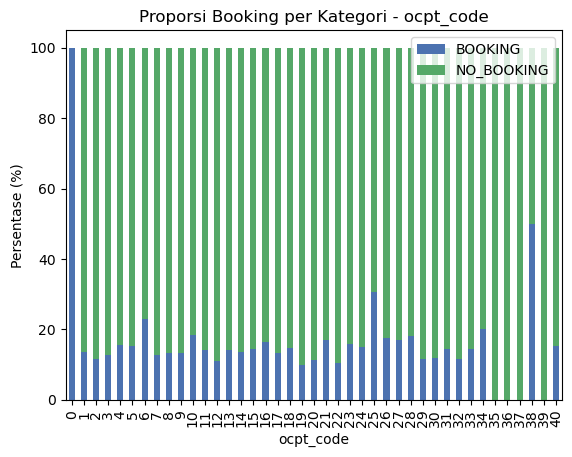

<Figure size 700x400 with 0 Axes>

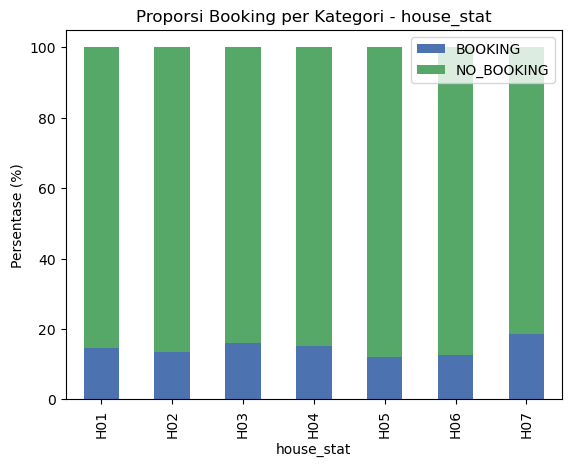

<Figure size 700x400 with 0 Axes>

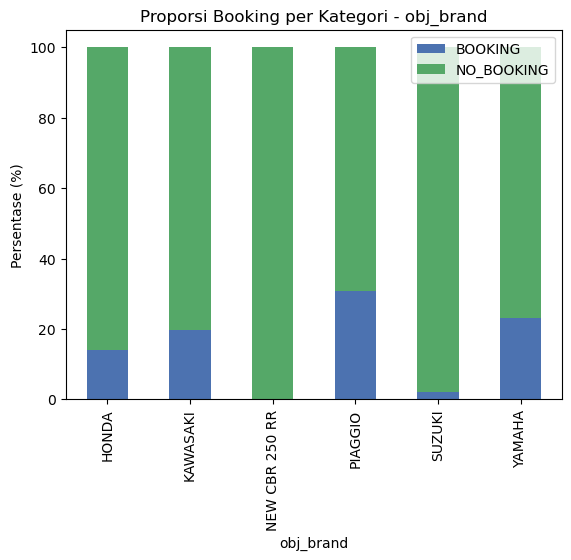

<Figure size 700x400 with 0 Axes>

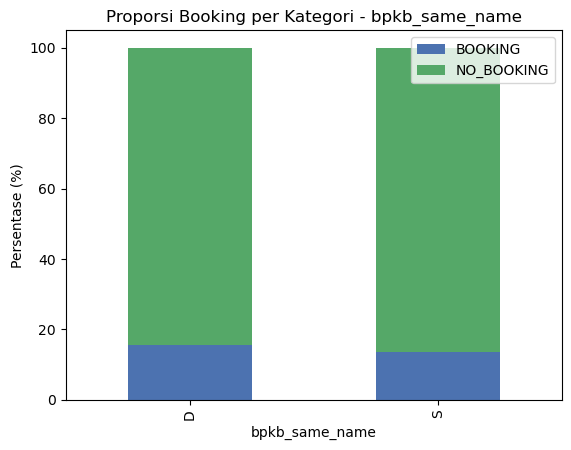

<Figure size 700x400 with 0 Axes>

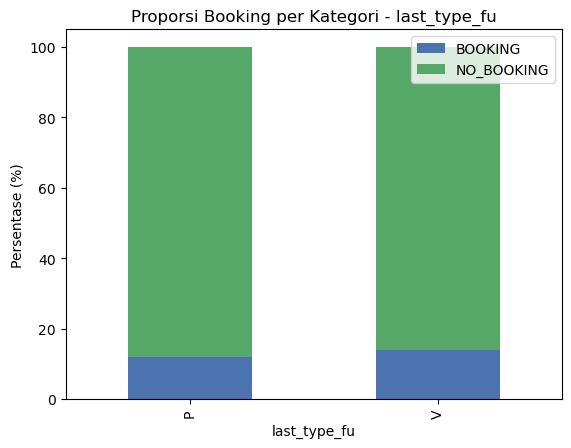

In [15]:
cat_cols = ['buss_unit','cust_sex','marital_stat','edu_type',
            'ocpt_code','house_stat','obj_brand','bpkb_same_name','last_type_fu']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    cross = pd.crosstab(data[col], data['is_book'], normalize='index') * 100
    cross[['BOOKING','NO_BOOKING']].plot(kind='bar', stacked=True, color=['#4c72b0','#55a868'])
    plt.title(f'Proporsi Booking per Kategori - {col}')
    plt.ylabel('Persentase (%)')
    plt.legend(loc='upper right')
    plt.show()


In [16]:
for col in cat_cols:
    ratio = data.groupby(col)['is_book'].apply(lambda x: (x=='BOOKING').mean()*100)
    print(f'\nPersentase BOOKING per kategori {col}:')
    print(ratio.sort_values(ascending=False))



Persentase BOOKING per kategori buss_unit:
buss_unit
REFI    24.710828
NMC      7.011524
Name: is_book, dtype: float64

Persentase BOOKING per kategori cust_sex:
cust_sex
F    14.916143
M    13.806868
Name: is_book, dtype: float64

Persentase BOOKING per kategori marital_stat:
marital_stat
D    16.344129
M    14.357987
S    13.073889
X     0.000000
Name: is_book, dtype: float64

Persentase BOOKING per kategori edu_type:
edu_type
S1    15.809126
S3    15.139442
ZZ    15.134916
SO    14.905715
SA    14.592529
SP    14.012816
S2    12.758362
SD    12.587592
Name: is_book, dtype: float64

Persentase BOOKING per kategori ocpt_code:
ocpt_code
0     100.000000
38     50.000000
25     30.769231
6      23.076923
34     20.070423
10     18.299712
28     18.113612
26     17.516986
21     16.996748
27     16.875000
16     16.379087
23     15.911123
4      15.656342
5      15.391550
40     15.384615
24     14.975599
18     14.688755
15     14.547262
33     14.525140
31     14.395132
11     14.1995

# C. Data Cleansing

## Deteksi dan Ganti Nilai Negatif

In [18]:
# 1. Deteksi baris dengan usia < 0
negatif_mask = data['usia'] < 0
print('Jumlah data usia negatif:', negatif_mask.sum())

Jumlah data usia negatif: 2


In [19]:
# 2. Ganti nilai negatif dengan NaN (agar bisa diisi nanti)
data.loc[negatif_mask, 'usia'] = np.nan

In [20]:
# 3. Isi nilai NaN dengan median usia valid (usia > 0)
median_usia = data.loc[data['usia'] > 0, 'usia'].median()
data['usia'] = data['usia'].fillna(median_usia)

# 4. Cek hasil
print('Nilai usia minimum setelah cleaning:', data['usia'].min())
print('Nilai median usia (digunakan untuk imputasi):', median_usia)

Nilai usia minimum setelah cleaning: 6.0
Nilai median usia (digunakan untuk imputasi): 41.0


## Salary Nasabah

In [21]:
# 1. Cek statistik awal salary
print(data['salary'].describe())

# 2. Ubah nilai tak logis (≤0) menjadi NaN
invalid_mask = data['salary'] <= 0
print('Jumlah salary ≤ 0:', invalid_mask.sum())
data.loc[invalid_mask, 'salary'] = np.nan

# 3. Tentukan batas atas realistis (winsorization di p99.5)
cap_salary = data['salary'].quantile(0.995)
print('Batas atas salary (p99.5):', cap_salary)

# Pangkas nilai di atas batas itu
data.loc[data['salary'] > cap_salary, 'salary'] = cap_salary

# 4. Imputasi nilai kosong dengan median
median_salary = data['salary'].median()
data['salary'] = data['salary'].fillna(median_salary)

# 5. Validasi hasil
print('Nilai salary minimum setelah cleaning:', data['salary'].min())
print('Nilai salary maksimum setelah cleaning:', data['salary'].max())
print('Median salary (digunakan imputasi):', median_salary)

count    2.243896e+06
mean     4.953577e+06
std      4.538033e+08
min      0.000000e+00
25%      3.000000e+06
50%      4.000000e+06
75%      5.000000e+06
max      5.042000e+11
Name: salary, dtype: float64
Jumlah salary ≤ 0: 50914
Batas atas salary (p99.5): 20000000.0
Nilai salary minimum setelah cleaning: 1.0
Nilai salary maksimum setelah cleaning: 20000000.0
Median salary (digunakan imputasi): 4000000.0


## Kolom Principal (Pokok Pinjaman)

In [22]:
# 1. Cek statistik awal principal
print(data['principal'].describe())

# 2. Ubah nilai tak logis (≤0) jadi NaN
invalid_principal = data['principal'] <= 0
print('Jumlah principal ≤ 0:', invalid_principal.sum())
data.loc[invalid_principal, 'principal'] = np.nan

# 3. Winsorize (pangkas ke p99.5)
cap_principal = data['principal'].quantile(0.995)
print('Batas atas principal (p99.5):', cap_principal)
data.loc[data['principal'] > cap_principal, 'principal'] = cap_principal

# 4. Imputasi median untuk NaN
median_principal = data['principal'].median()
data['principal'] = data['principal'].fillna(median_principal)

# 5. Validasi hasil
print('Nilai principal minimum setelah cleaning:', data['principal'].min())
print('Nilai principal maksimum setelah cleaning:', data['principal'].max())
print('Median principal (digunakan imputasi):', median_principal)


count    2.243963e+06
mean     1.624954e+07
std      6.945084e+06
min      2.878410e+05
25%      1.049000e+07
50%      1.721014e+07
75%      2.048142e+07
max      8.174350e+08
Name: principal, dtype: float64
Jumlah principal ≤ 0: 0
Batas atas principal (p99.5): 35132870.83
Nilai principal minimum setelah cleaning: 287841.0
Nilai principal maksimum setelah cleaning: 35132870.83
Median principal (digunakan imputasi): 17210143.0


## kolom month_inst (angsuran bulanan).

In [23]:
# 1. Statistik awal
print(data['month_inst'].describe())

# 2. Nilai tak logis (≤0)
invalid_inst = data['month_inst'] <= 0
print('Jumlah month_inst ≤ 0:', invalid_inst.sum())
data.loc[invalid_inst, 'month_inst'] = np.nan

# 3. Filter nilai tidak realistis > 50 juta
mask_high = data['month_inst'] > 50_000_000
print('Jumlah nilai > 50 juta:', mask_high.sum())
data = data.loc[~mask_high].copy()

# 4. Pangkas ke quantile 99.5 (winsorization)
cap_inst = data['month_inst'].quantile(0.995)
print('Batas atas (p99.5):', cap_inst)
data.loc[data['month_inst'] > cap_inst, 'month_inst'] = cap_inst

# 5. Imputasi median
median_inst = data['month_inst'].median()
data['month_inst'] = data['month_inst'].fillna(median_inst)

# 6. Validasi hasil
print('Nilai min setelah cleaning:', data['month_inst'].min())
print('Nilai max setelah cleaning:', data['month_inst'].max())
print('Median month_inst:', median_inst)

count    2.236352e+06
mean     1.168485e+06
std      9.479715e+05
min      7.500000e+04
25%      7.760000e+05
50%      1.000000e+06
75%      1.330000e+06
max      3.276900e+07
Name: month_inst, dtype: float64
Jumlah month_inst ≤ 0: 0
Jumlah nilai > 50 juta: 0
Batas atas (p99.5): 7045000.0
Nilai min setelah cleaning: 75000.0
Nilai max setelah cleaning: 7045000.0
Median month_inst: 1000000.0


## Cleaning grs_dp

In [24]:
# 1. Statistik awal
print(data['grs_dp'].describe())

# 2. Nilai tidak logis (≤ 0)
invalid_dp = data['grs_dp'] <= 0
print('Jumlah grs_dp ≤ 0:', invalid_dp.sum())
data.loc[invalid_dp, 'grs_dp'] = np.nan

# 3. Winsorize (pangkas ke p99.5)
cap_dp = data['grs_dp'].quantile(0.995)
print('Batas atas (p99.5):', cap_dp)
data.loc[data['grs_dp'] > cap_dp, 'grs_dp'] = cap_dp

# 4. Imputasi median
median_dp = data['grs_dp'].median()
data['grs_dp'] = data['grs_dp'].fillna(median_dp)

# 5. Validasi hasil
print('Nilai min setelah cleaning:', data['grs_dp'].min())
print('Nilai max setelah cleaning:', data['grs_dp'].max())
print('Median grs_dp (digunakan imputasi):', median_dp)


count    2.243808e+06
mean     4.163108e+06
std      2.876917e+06
min      0.000000e+00
25%      2.400000e+06
50%      3.300000e+06
75%      5.000000e+06
max      3.052211e+08
Name: grs_dp, dtype: float64
Jumlah grs_dp ≤ 0: 16924
Batas atas (p99.5): 18300000.0
Nilai min setelah cleaning: 400000.0
Nilai max setelah cleaning: 18300000.0
Median grs_dp (digunakan imputasi): 3300000.0


## Review Semua variabel numerik utama hasil cleaning.

In [25]:
# Gabungkan kelima variabel utama
num_summary = data[['usia', 'salary', 'principal', 'month_inst', 'grs_dp']].describe(
    percentiles=[.01, .25, .5, .75, .99]
).T

# Tambahkan kolom tambahan (range & rasio variasi)
num_summary['range'] = num_summary['max'] - num_summary['min']
num_summary['coef_var'] = num_summary['std'] / num_summary['mean']  # koefisien variasi

# Tampilkan tabel hasil review
pd.options.display.float_format = '{:,.2f}'.format  # biar lebih rapi
print(num_summary)


                  count          mean          std        min           1%  \
usia       2,243,963.00         40.58        10.33       6.00        23.00   
salary     2,243,963.00  4,443,678.54 2,434,778.24       1.00   900,000.00   
principal  2,243,963.00 16,236,398.29 6,867,607.34 287,841.00 3,490,000.00   
month_inst 2,243,963.00  1,146,609.91   691,374.61  75,000.00   375,000.00   
grs_dp     2,243,963.00  4,170,304.70 2,731,638.30 400,000.00 1,250,000.00   

                     25%           50%           75%           99%  \
usia               32.00         41.00         49.00         61.00   
salary      3,000,000.00  4,000,000.00  5,000,000.00 15,000,000.00   
principal  10,490,000.00 17,210,143.00 20,481,421.50 33,818,694.00   
month_inst    777,000.00  1,000,000.00  1,329,000.00  3,675,000.00   
grs_dp      2,455,000.00  3,300,000.00  5,000,000.00 15,300,000.00   

                     max         range  coef_var  
usia               79.00         73.00      0.25  
salary  

## Rasio Finansial

In [26]:
# 1️⃣ Rasio uang muka terhadap pinjaman (komitmen awal)
data['dp_ratio'] = (data['grs_dp'] / data['principal']).clip(0, 1.5)

# 2️⃣ Rasio cicilan terhadap gaji (kemampuan bayar bulanan)
data['inst_ratio'] = (data['month_inst'] / (data['salary'] + 1)).clip(0, 2.0)

# 3️⃣ Pinjaman per tenor (indikator besar kredit per bulan)
data['loan_per_tenor'] = data['principal'] / data['top'].replace(0, np.nan)

# 4️⃣ Cek statistik ringkas dari ketiga rasio
ratio_summary = data[['dp_ratio', 'inst_ratio', 'loan_per_tenor']].describe(
    percentiles=[.01, .25, .5, .75, .99]
).T

pd.options.display.float_format = '{:,.3f}'.format
print(ratio_summary)

                       count        mean         std        min          1%  \
dp_ratio       2,243,963.000       0.332       0.325      0.036       0.083   
inst_ratio     2,243,963.000       0.314       0.248      0.012       0.070   
loan_per_tenor 2,243,963.000 788,231.570 413,456.495 71,960.250 227,190.290   

                       25%         50%         75%           99%  \
dp_ratio             0.133       0.202       0.366         1.500   
inst_ratio           0.182       0.255       0.360         1.609   
loan_per_tenor 520,416.667 689,233.457 949,000.000 2,247,778.372   

                          max  
dp_ratio                1.500  
inst_ratio              2.000  
loan_per_tenor 10,495,000.000  


## Log Transform 

In [27]:
# 1️⃣ Buat versi log untuk semua variabel finansial utama
for col in ['salary', 'principal', 'grs_dp', 'month_inst']:
    data[f'log_{col}'] = np.log1p(data[col])

# 2️⃣ Tampilkan statistik deskriptif dari hasil log transform
log_summary = data[['log_salary', 'log_principal', 'log_grs_dp', 'log_month_inst']].describe().T

pd.options.display.float_format = '{:,.3f}'.format
print(log_summary)


                       count   mean   std    min    25%    50%    75%    max
log_salary     2,243,963.000 15.169 0.685  0.693 14.914 15.202 15.425 16.811
log_principal  2,243,963.000 16.495 0.495 12.570 16.166 16.661 16.835 17.375
log_grs_dp     2,243,963.000 15.089 0.527 12.899 14.714 15.009 15.425 16.722
log_month_inst 2,243,963.000 13.844 0.439 11.225 13.563 13.816 14.100 15.768


## Kategorisasi Tenor

In [28]:
# 1️⃣ Membuat fungsi kategorisasi tenor
def label_tenor(x):
    if x <= 18:
        return 'Short'
    elif x <= 30:
        return 'Medium'
    else:
        return 'Long'

# 2️⃣ Terapkan ke kolom baru
data['top_cat'] = data['top'].apply(label_tenor)

# 3️⃣ Cek distribusi kategori tenor
print(data['top_cat'].value_counts(normalize=True).mul(100).round(2))


top_cat
Short    41.160
Medium   32.410
Long     26.430
Name: proportion, dtype: float64


## Encoding & Data Preparation untuk Modeling

In [29]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

RANDOM_STATE = 42
pd.set_option("display.max_columns", 200)


### Target & ID

In [30]:
TARGET_COL = "is_book"
ID_COLS = [c for c in ["cust_no", "appl_no", "contract_no"] if c in data.columns]

# map target: 1=BOOKING, 0=NO_BOOKING
if data[TARGET_COL].dtype == "O":
    data[TARGET_COL] = data[TARGET_COL].map({"BOOKING":1, "NO_BOOKING":0}).astype("int8")

# buang baris tanpa target
data = data.dropna(subset=[TARGET_COL]).reset_index(drop=True)

print("Distribusi target (%):")
print((data[TARGET_COL].value_counts(normalize=True)*100).round(3))


Distribusi target (%):
is_book
0   85.709
1   14.291
Name: proportion, dtype: float64


### Fitur numerik & kategorikal

In [31]:
# semua fitur kecuali ID & target
feature_cols = [c for c in data.columns if c not in ID_COLS + [TARGET_COL]]

# kategorikal default: dtype object/category
cat_cols = [c for c in feature_cols if str(data[c].dtype) in ("object", "category")]
num_cols = [c for c in feature_cols if c not in cat_cols]

# khusus: perlakukan 'ocpt_code' sebagai kategorikal walau int
if "ocpt_code" in feature_cols and "ocpt_code" in num_cols:
    num_cols.remove("ocpt_code")
    cat_cols.append("ocpt_code")

print(f"Total fitur={len(feature_cols)} | num={len(num_cols)} | cat={len(cat_cols)}")


Total fitur=34 | num=21 | cat=13


### Split train–test TANPA bocor (group by cust_no)

In [32]:
groups = data["cust_no"] if "cust_no" in data.columns else pd.Series(np.arange(len(data)))

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE)
train_idx, test_idx = next(gss.split(data[feature_cols], data[TARGET_COL], groups=groups))

train_df = data.iloc[train_idx].reset_index(drop=True)
test_df  = data.iloc[test_idx].reset_index(drop=True)

X_train, y_train = train_df[feature_cols].copy(), train_df[TARGET_COL].astype(int).values
X_test,  y_test  = test_df[feature_cols].copy(),  test_df[TARGET_COL].astype(int).values

def pos_rate(y): y = np.asarray(y); return (y.sum()/len(y)) if len(y) else np.nan
print(f"Train: {X_train.shape}, pos_rate={pos_rate(y_train):.4f}")
print(f"Test : {X_test.shape},  pos_rate={pos_rate(y_test):.4f}")


Train: (1795330, 34), pos_rate=0.1428
Test : (448633, 34),  pos_rate=0.1434


### Preprocessor (impute + scale + OHE, hemat & cepat)

In [33]:
# pastikan kolom kategorikal jadi string (aman untuk OHE)
for c in cat_cols:
    X_train.loc[:, c] = X_train[c].astype(str)
    X_test.loc[:, c]  = X_test[c].astype(str)

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=True,
        min_frequency=0.01,     # gabung kategori <1%
        dtype=np.float32
    ))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ],
    remainder="drop",
    sparse_threshold=1.0
)


/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_11483/1596567429.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '4' '4' ... '8' '4' '4']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, c] = X_train[c].astype(str)
/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_11483/1596567429.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['26' '23' '4' ... '20' '5' '7']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, c]  = X_test[c].astype(str)


### Fit di TRAIN, transform TRAIN & TEST (anti-leak)

In [34]:
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc  = preprocessor.transform(X_test)

# hemat memori/CPU
try:
    X_train_enc = X_train_enc.astype(np.float32)
    X_test_enc  = X_test_enc.astype(np.float32)
except Exception:
    pass

print("Encoded shapes:", X_train_enc.shape, X_test_enc.shape)


Encoded shapes: (1795330, 92) (448633, 92)


### Ringkasan imbalance (referensi untuk model boosting)

In [35]:
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
scale_pos_weight = neg / max(pos, 1)
print(f"Train counts: neg={neg}, pos={pos} -> scale_pos_weight≈{scale_pos_weight:.2f}")


Train counts: neg=1538965, pos=256365 -> scale_pos_weight≈6.00


# Modelling

## Modelling Baseline

### 9.1 Buat validation split dari TRAIN (untuk early stopping)

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
idx_tr, idx_val = next(sss.split(X_train_enc, y_train))

X_tr_enc, y_tr = X_train_enc[idx_tr], y_train[idx_tr]
X_val_enc, y_val = X_train_enc[idx_val], y_train[idx_val]

X_tr_enc = X_tr_enc.astype("float32")
X_val_enc = X_val_enc.astype("float32")

### 9.2 Latih XGBoost cepat (hist + early stopping)

In [37]:
# 9.2 — Train XGBoost (versi-agnostik, dengan early stopping)
import xgboost as xgb
import numpy as np

neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
spw = neg / max(pos, 1)

# Parameter booster
params = {
    "objective": "binary:logistic",
    "eval_metric": "aucpr",     # lebih relevan untuk imbalance
    "tree_method": "hist",      # cepat
    "eta": 0.05,                # = learning_rate
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": spw,
    "random_state": 42,
}

# DMatrix dari matriks encoded (sparse aman)
dtr  = xgb.DMatrix(X_tr_enc, label=y_tr)
dval = xgb.DMatrix(X_val_enc, label=y_val)
dte  = xgb.DMatrix(X_test_enc)

num_boost_round = 1000  # besar, nanti dihentikan lebih awal

# Coba callback (v2.x); jika tak tersedia/ditolak, fallback ke early_stopping_rounds (v1.x)
booster = None
try:
    es = xgb.callback.EarlyStopping(rounds=50, save_best=True, maximize=True)
    booster = xgb.train(
        params=params,
        dtrain=dtr,
        num_boost_round=num_boost_round,
        evals=[(dval, "val")],
        callbacks=[es]
    )
except Exception:
    booster = xgb.train(
        params=params,
        dtrain=dtr,
        num_boost_round=num_boost_round,
        evals=[(dval, "val")],
        early_stopping_rounds=50
    )

# Prediksi test pakai iterasi terbaik (kompatibel lintas versi)
if hasattr(booster, "best_ntree_limit") and booster.best_ntree_limit is not None:
    y_proba_test = booster.predict(dte, ntree_limit=booster.best_ntree_limit)
elif hasattr(booster, "best_iteration") and booster.best_iteration is not None:
    y_proba_test = booster.predict(dte, iteration_range=(0, booster.best_iteration + 1))
else:
    y_proba_test = booster.predict(dte)


[0]	val-aucpr:0.33845
[1]	val-aucpr:0.34861
[2]	val-aucpr:0.35347
[3]	val-aucpr:0.35559
[4]	val-aucpr:0.35614
[5]	val-aucpr:0.35740
[6]	val-aucpr:0.35778
[7]	val-aucpr:0.35813
[8]	val-aucpr:0.35937
[9]	val-aucpr:0.35956
[10]	val-aucpr:0.35913
[11]	val-aucpr:0.36004
[12]	val-aucpr:0.36001
[13]	val-aucpr:0.36041
[14]	val-aucpr:0.36112
[15]	val-aucpr:0.36132
[16]	val-aucpr:0.36181
[17]	val-aucpr:0.36214
[18]	val-aucpr:0.36221
[19]	val-aucpr:0.36242
[20]	val-aucpr:0.36254
[21]	val-aucpr:0.36280
[22]	val-aucpr:0.36306
[23]	val-aucpr:0.36323
[24]	val-aucpr:0.36344
[25]	val-aucpr:0.36372
[26]	val-aucpr:0.36393
[27]	val-aucpr:0.36409
[28]	val-aucpr:0.36421
[29]	val-aucpr:0.36449
[30]	val-aucpr:0.36470
[31]	val-aucpr:0.36485
[32]	val-aucpr:0.36510
[33]	val-aucpr:0.36536
[34]	val-aucpr:0.36570
[35]	val-aucpr:0.36601
[36]	val-aucpr:0.36621
[37]	val-aucpr:0.36640
[38]	val-aucpr:0.36655
[39]	val-aucpr:0.36658
[40]	val-aucpr:0.36670
[41]	val-aucpr:0.36692
[42]	val-aucpr:0.36703
[43]	val-aucpr:0.3671

In [38]:
# Ambil info best iteration/score lintas versi
attrs = booster.attributes()  # untuk xgboost>=2
best_iter = int(attrs.get("best_iteration", 999))
best_score = float(attrs.get("best_score", 0.0))
print("Best iter:", best_iter, "| Best val-aucpr:", best_score)

# Prediksi TEST pakai iterasi terbaik (robust untuk v1/v2)
try:
    y_proba_test = booster.predict(dte, iteration_range=(0, best_iter + 1))
except TypeError:
    y_proba_test = booster.predict(dte, ntree_limit=getattr(booster, "best_ntree_limit", best_iter + 1))


Best iter: 982 | Best val-aucpr: 0.39057469908382836


In [39]:
from sklearn.metrics import roc_auc_score, average_precision_score
print("TEST | ROC-AUC:", roc_auc_score(y_test, y_proba_test))
print("TEST | PR-AUC :", average_precision_score(y_test, y_proba_test))


TEST | ROC-AUC: 0.7799600042651775
TEST | PR-AUC : 0.38892598705260384


In [40]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report
# proba VALID di iterasi terbaik
try:
    y_proba_val = booster.predict(dval, iteration_range=(0, best_iter + 1))
except TypeError:
    y_proba_val = booster.predict(dval, ntree_limit=getattr(booster, "best_ntree_limit", best_iter + 1))

prec, rec, thr = precision_recall_curve(y_val, y_proba_val)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
best_thr = thr[f1.argmax()]
print("Best threshold (F1):", best_thr)

# apply ke TEST
y_pred_test = (y_proba_test >= best_thr).astype(int)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits=4))


Best threshold (F1): 0.6092355
[[312256  72060]
 [ 28258  36059]]
              precision    recall  f1-score   support

           0     0.9170    0.8125    0.8616    384316
           1     0.3335    0.5606    0.4182     64317

    accuracy                         0.7764    448633
   macro avg     0.6253    0.6866    0.6399    448633
weighted avg     0.8334    0.7764    0.7980    448633



## Model Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix
from tqdm.auto import tqdm
import time
import sys

print("="*70)
print("TRAINING RANDOM FOREST DENGAN PARAMETER OPTIMAL")
print("="*70)

# Parameter yang sudah dioptimasi untuk big data
rf = RandomForestClassifier(
    n_estimators=100,          # Cukup 100 trees (vs 300 yang gagal)
    max_depth=20,              # Batasi kedalaman untuk speed
    min_samples_split=200,     # Lebih tinggi = lebih cepat
    min_samples_leaf=100,      # Lebih tinggi = lebih cepat
    max_features='sqrt',       # Default, sudah optimal
    max_samples=0.8,           # Bootstrap 80% data (lebih cepat)
    class_weight='balanced_subsample',
    n_jobs=-1,                 # Gunakan semua CPU cores
    random_state=42,
    verbose=0,                 # Matikan verbose bawaan
    warm_start=True            # Enable warm_start untuk incremental training
)

# Training dengan time tracking DAN progress bar
print(f"\nDataset size: {X_train_enc.shape}")
print(f"Positive class: {(y_train==1).sum():,} ({(y_train==1).sum()/len(y_train)*100:.2f}%)")
print(f"\nStarting training at: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print("-"*70)

start_time = time.time()

# Training dengan progress bar
n_estimators = 100
batch_size = 10  # Train 10 trees at a time untuk update progress

with tqdm(total=n_estimators, desc="Training RF", unit="tree", 
          bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} trees [{elapsed}<{remaining}, {rate_fmt}]') as pbar:
    
    for i in range(0, n_estimators, batch_size):
        # Set jumlah trees untuk batch ini
        rf.n_estimators = min(i + batch_size, n_estimators)
        
        # Train (hanya menambah trees baru karena warm_start=True)
        rf.fit(X_train_enc, y_train)
        
        # Update progress bar
        trees_added = min(batch_size, n_estimators - i)
        pbar.update(trees_added)
        
        # Optional: tampilkan estimasi waktu tersisa
        if i > 0:
            elapsed = time.time() - start_time
            trees_per_sec = (i + trees_added) / elapsed
            remaining_trees = n_estimators - (i + trees_added)
            eta_seconds = remaining_trees / trees_per_sec if trees_per_sec > 0 else 0
            pbar.set_postfix({
                'ETA': f'{eta_seconds/60:.1f}min',
                'Trees/sec': f'{trees_per_sec:.2f}'
            })

training_time = time.time() - start_time

print("-"*70)
print(f"✅ Training completed in: {training_time/60:.2f} minutes ({training_time:.1f} seconds)")
print(f"   Average: {training_time/n_estimators:.2f} seconds per tree")
print(f"   Finished at: {time.strftime('%Y-%m-%d %H:%M:%S')}")

# Evaluasi dengan progress
print("\n" + "="*70)
print("EVALUASI MODEL RANDOM FOREST")
print("="*70)

print("\n🔄 Generating predictions...")
with tqdm(total=2, desc="Prediction", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}]') as pbar:
    y_proba_rf = rf.predict_proba(X_test_enc)[:, 1]
    pbar.update(1)
    y_pred_rf = rf.predict(X_test_enc)
    pbar.update(1)

print("\n📊 Computing metrics...")
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)

print(f"\n{'='*70}")
print(f"HASIL EVALUASI")
print(f"{'='*70}")
print(f"Random Forest | ROC-AUC: {roc_auc_rf:.4f}")
print(f"Random Forest | PR-AUC : {pr_auc_rf:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

# Hitung metrik tambahan dari confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"  True Negatives  (TN): {tn:,}")
print(f"  False Positives (FP): {fp:,}")
print(f"  False Negatives (FN): {fn:,}")
print(f"  True Positives  (TP): {tp:,}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

print("="*70)

# Summary
print(f"\n🎯 SUMMARY")
print(f"{'='*70}")
print(f"Model         : Random Forest")
print(f"Trees         : {n_estimators}")
print(f"Training Time : {training_time/60:.2f} minutes")
print(f"ROC-AUC       : {roc_auc_rf:.4f}")
print(f"PR-AUC        : {pr_auc_rf:.4f}")
print(f"Accuracy      : {(tp+tn)/(tp+tn+fp+fn):.4f}")
print(f"Precision     : {tp/(tp+fp):.4f}")
print(f"Recall        : {tp/(tp+fn):.4f}")
print(f"F1-Score      : {2*tp/(2*tp+fp+fn):.4f}")
print(f"{'='*70}")

TRAINING RANDOM FOREST DENGAN PARAMETER OPTIMAL

Dataset size: (1795330, 92)
Positive class: 256,365 (14.28%)

Starting training at: 2025-10-20 09:26:46
----------------------------------------------------------------------


Training RF:   0%|          | 0/100 trees [00:00<?, ?tree/s]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

----------------------------------------------------------------------
✅ Training completed in: 9.89 minutes (593.6 seconds)
   Average: 5.94 seconds per tree
   Finished at: 2025-10-20 09:36:40

EVALUASI MODEL RANDOM FOREST

🔄 Generating predictions...


Prediction:   0%|          | 0/2 [00:00]


📊 Computing metrics...

HASIL EVALUASI
Random Forest | ROC-AUC: 0.7714
Random Forest | PR-AUC : 0.3719

Confusion Matrix:
[[258435 125881]
 [ 17843  46474]]

Breakdown:
  True Negatives  (TN): 258,435
  False Positives (FP): 125,881
  False Negatives (FN): 17,843
  True Positives  (TP): 46,474

Classification Report:
              precision    recall  f1-score   support

           0     0.9354    0.6725    0.7824    384316
           1     0.2696    0.7226    0.3927     64317

    accuracy                         0.6796    448633
   macro avg     0.6025    0.6975    0.5876    448633
weighted avg     0.8400    0.6796    0.7266    448633


🎯 SUMMARY
Model         : Random Forest
Trees         : 100
Training Time : 9.89 minutes
ROC-AUC       : 0.7714
PR-AUC        : 0.3719
Accuracy      : 0.6796
Precision     : 0.2696
Recall        : 0.7226
F1-Score      : 0.3927


# Model XGBoost

In [43]:
import xgboost as xgb
import numpy as np
import time
from tqdm.auto import tqdm
from sklearn.metrics import (
    roc_auc_score, 
    average_precision_score,
    classification_report, 
    confusion_matrix,
    precision_recall_curve
)

print("="*70)
print("TRAINING XGBOOST DENGAN PARAMETER OPTIMAL")
print("="*70)

# Hitung scale_pos_weight untuk imbalanced data
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
spw = neg / max(pos, 1)

print(f"\nDataset Information:")
print(f"  Training size   : {X_train_enc.shape}")
print(f"  Validation size : {X_val_enc.shape}")
print(f"  Test size       : {X_test_enc.shape}")
print(f"  Positive class  : {pos:,} ({pos/len(y_train)*100:.2f}%)")
print(f"  Negative class  : {neg:,} ({neg/len(y_train)*100:.2f}%)")
print(f"  Scale pos weight: {spw:.2f}")

# Parameter XGBoost yang optimal
params = {
    "objective": "binary:logistic",
    "eval_metric": "aucpr",           # PR-AUC untuk imbalanced data
    "tree_method": "hist",            # Cepat dan efisien
    "max_depth": 6,                   # Kedalaman pohon
    "eta": 0.05,                      # Learning rate
    "subsample": 0.8,                 # Row sampling
    "colsample_bytree": 0.8,          # Column sampling
    "min_child_weight": 3,            # Minimum sum of instance weight
    "gamma": 0.1,                     # Minimum loss reduction
    "reg_alpha": 0.1,                 # L1 regularization
    "reg_lambda": 1.0,                # L2 regularization
    "scale_pos_weight": spw,          # Handle imbalanced data
    "random_state": 42,
}

print(f"\nXGBoost Parameters:")
for key, value in params.items():
    print(f"  {key:20s}: {value}")

# Prepare DMatrix
print("\n🔄 Preparing DMatrix...")
with tqdm(total=3, desc="DMatrix prep", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}') as pbar:
    dtr = xgb.DMatrix(X_tr_enc, label=y_tr)
    pbar.update(1)
    dval = xgb.DMatrix(X_val_enc, label=y_val)
    pbar.update(1)
    dte = xgb.DMatrix(X_test_enc)
    pbar.update(1)

print("✅ DMatrix preparation complete")

# Training configuration
num_boost_round = 1000
early_stopping_rounds = 50

print(f"\n{'='*70}")
print(f"Starting training at: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Max iterations: {num_boost_round}")
print(f"Early stopping: {early_stopping_rounds} rounds")
print(f"{'='*70}\n")

# Custom callback untuk progress bar
class TqdmCallback(xgb.callback.TrainingCallback):
    def __init__(self, total_rounds):
        self.pbar = tqdm(total=total_rounds, 
                        desc="Training XGBoost",
                        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} rounds [{elapsed}<{remaining}, {rate_fmt}]')
        self.best_score = 0
        self.best_iteration = 0
        
    def after_iteration(self, model, epoch, evals_log):
        self.pbar.update(1)
        
        # Update best score
        if 'val' in evals_log and 'aucpr' in evals_log['val']:
            current_score = evals_log['val']['aucpr'][-1]
            if current_score > self.best_score:
                self.best_score = current_score
                self.best_iteration = epoch
            
            # Update postfix dengan info penting
            self.pbar.set_postfix({
                'val_aucpr': f'{current_score:.4f}',
                'best': f'{self.best_score:.4f}@{self.best_iteration}'
            })
        
        return False
    
    def after_training(self, model):
        self.pbar.close()
        return model

# Start training dengan progress tracking
start_time = time.time()

try:
    # XGBoost v2.x dengan callbacks
    es = xgb.callback.EarlyStopping(
        rounds=early_stopping_rounds,
        save_best=True,
        maximize=True,
        metric_name='aucpr'
    )
    
    progress_callback = TqdmCallback(num_boost_round)
    
    booster = xgb.train(
        params=params,
        dtrain=dtr,
        num_boost_round=num_boost_round,
        evals=[(dval, "val")],
        callbacks=[es, progress_callback],
        verbose_eval=False
    )
    
except Exception as e:
    print(f"⚠️  Callback method failed, using fallback...")
    # Fallback untuk XGBoost v1.x
    evals_result = {}
    booster = xgb.train(
        params=params,
        dtrain=dtr,
        num_boost_round=num_boost_round,
        evals=[(dval, "val")],
        early_stopping_rounds=early_stopping_rounds,
        evals_result=evals_result,
        verbose_eval=50
    )

training_time = time.time() - start_time

print(f"\n{'='*70}")
print(f"✅ Training completed in: {training_time/60:.2f} minutes ({training_time:.1f} seconds)")
print(f"   Finished at: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"{'='*70}")

# Get best iteration info
try:
    attrs = booster.attributes()
    best_iter = int(attrs.get("best_iteration", 999))
    best_score = float(attrs.get("best_score", 0.0))
    print(f"\n🏆 Best Iteration: {best_iter}")
    print(f"   Best Val AUCPR: {best_score:.4f}")
except:
    best_iter = booster.best_iteration if hasattr(booster, 'best_iteration') else 999
    print(f"\n🏆 Best Iteration: {best_iter}")

# Prediction dengan progress
print(f"\n{'='*70}")
print("PREDICTION & EVALUATION")
print(f"{'='*70}")

print("\n🔄 Generating predictions on test set...")
with tqdm(total=1, desc="Prediction", bar_format='{l_bar}{bar}| [{elapsed}]') as pbar:
    # Predict dengan best iteration
    try:
        y_proba_xgb = booster.predict(dte, iteration_range=(0, best_iter + 1))
    except TypeError:
        # Fallback untuk XGBoost v1.x
        if hasattr(booster, 'best_ntree_limit'):
            y_proba_xgb = booster.predict(dte, ntree_limit=booster.best_ntree_limit)
        else:
            y_proba_xgb = booster.predict(dte)
    pbar.update(1)

print("✅ Predictions generated")

# Compute metrics
print("\n📊 Computing evaluation metrics...")

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
pr_auc_xgb = average_precision_score(y_test, y_proba_xgb)

# Find optimal threshold menggunakan F1-score
print("   Finding optimal threshold...")
prec, rec, thr = precision_recall_curve(y_test, y_proba_xgb)
f1_scores = 2 * prec * rec / (prec + rec + 1e-9)
best_thr = thr[f1_scores.argmax()]

y_pred_xgb = (y_proba_xgb >= best_thr).astype(int)

print(f"\n{'='*70}")
print(f"HASIL EVALUASI XGBOOST")
print(f"{'='*70}")
print(f"XGBoost | ROC-AUC: {roc_auc_xgb:.4f}")
print(f"XGBoost | PR-AUC : {pr_auc_xgb:.4f}")
print(f"Optimal Threshold: {best_thr:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

# Breakdown confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"  True Negatives  (TN): {tn:,}")
print(f"  False Positives (FP): {fp:,}")
print(f"  False Negatives (FN): {fn:,}")
print(f"  True Positives  (TP): {tp:,}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))

print(f"{'='*70}")

# Summary
precision_xgb = tp/(tp+fp) if (tp+fp) > 0 else 0
recall_xgb = tp/(tp+fn) if (tp+fn) > 0 else 0
f1_xgb = 2*tp/(2*tp+fp+fn) if (2*tp+fp+fn) > 0 else 0
accuracy_xgb = (tp+tn)/(tp+tn+fp+fn)

print(f"\n🎯 SUMMARY")
print(f"{'='*70}")
print(f"Model              : XGBoost")
print(f"Best Iteration     : {best_iter}")
print(f"Training Time      : {training_time/60:.2f} minutes")
print(f"Avg Time/Round     : {training_time/best_iter:.2f} seconds")
print(f"")
print(f"ROC-AUC            : {roc_auc_xgb:.4f}")
print(f"PR-AUC             : {pr_auc_xgb:.4f}")
print(f"Accuracy           : {accuracy_xgb:.4f}")
print(f"Precision          : {precision_xgb:.4f}")
print(f"Recall             : {recall_xgb:.4f}")
print(f"F1-Score           : {f1_xgb:.4f}")
print(f"")
print(f"False Positives    : {fp:,}")
print(f"False Negatives    : {fn:,}")
print(f"Optimal Threshold  : {best_thr:.4f}")
print(f"{'='*70}")

# Store results untuk comparison
xgb_results = {
    'model': 'XGBoost',
    'roc_auc': roc_auc_xgb,
    'pr_auc': pr_auc_xgb,
    'precision': precision_xgb,
    'recall': recall_xgb,
    'f1_score': f1_xgb,
    'accuracy': accuracy_xgb,
    'training_time': training_time,
    'best_iteration': best_iter,
    'threshold': best_thr,
    'fp': fp,
    'fn': fn,
    'tp': tp,
    'tn': tn
}

print("\n✅ XGBoost training dan evaluasi selesai!")
print("💾 Results stored in 'xgb_results' dictionary")

TRAINING XGBOOST DENGAN PARAMETER OPTIMAL

Dataset Information:
  Training size   : (1795330, 92)
  Validation size : (179533, 92)
  Test size       : (448633, 92)
  Positive class  : 256,365 (14.28%)
  Negative class  : 1,538,965 (85.72%)
  Scale pos weight: 6.00

XGBoost Parameters:
  objective           : binary:logistic
  eval_metric         : aucpr
  tree_method         : hist
  max_depth           : 6
  eta                 : 0.05
  subsample           : 0.8
  colsample_bytree    : 0.8
  min_child_weight    : 3
  gamma               : 0.1
  reg_alpha           : 0.1
  reg_lambda          : 1.0
  scale_pos_weight    : 6.003023033565424
  random_state        : 42

🔄 Preparing DMatrix...


DMatrix prep:   0%|          | 0/3

✅ DMatrix preparation complete

Starting training at: 2025-10-20 09:36:43
Max iterations: 1000
Early stopping: 50 rounds



Training XGBoost:   0%|          | 0/1000 rounds [00:00<?, ?it/s]


✅ Training completed in: 1.57 minutes (94.3 seconds)
   Finished at: 2025-10-20 09:38:18

🏆 Best Iteration: 984
   Best Val AUCPR: 0.3909

PREDICTION & EVALUATION

🔄 Generating predictions on test set...


Prediction:   0%|          | [00:00]

✅ Predictions generated

📊 Computing evaluation metrics...
   Finding optimal threshold...

HASIL EVALUASI XGBOOST
XGBoost | ROC-AUC: 0.7799
XGBoost | PR-AUC : 0.3891
Optimal Threshold: 0.5978

Confusion Matrix:
[[307259  77057]
 [ 26922  37395]]

Breakdown:
  True Negatives  (TN): 307,259
  False Positives (FP): 77,057
  False Negatives (FN): 26,922
  True Positives  (TP): 37,395

Classification Report:
              precision    recall  f1-score   support

           0     0.9194    0.7995    0.8553    384316
           1     0.3267    0.5814    0.4184     64317

    accuracy                         0.7682    448633
   macro avg     0.6231    0.6905    0.6368    448633
weighted avg     0.8345    0.7682    0.7926    448633


🎯 SUMMARY
Model              : XGBoost
Best Iteration     : 984
Training Time      : 1.57 minutes
Avg Time/Round     : 0.10 seconds

ROC-AUC            : 0.7799
PR-AUC             : 0.3891
Accuracy           : 0.7682
Precision          : 0.3267
Recall             

# Model Logictic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, 
    average_precision_score,
    classification_report, 
    confusion_matrix,
    precision_recall_curve
)
from tqdm.auto import tqdm
import time
import numpy as np
import pandas as pd

print("="*70)
print("TRAINING LOGISTIC REGRESSION DENGAN PARAMETER OPTIMAL")
print("="*70)

# Dataset information
print(f"\nDataset Information:")
print(f"  Training size   : {X_train_enc.shape}")
print(f"  Test size       : {X_test_enc.shape}")
print(f"  Positive class  : {(y_train==1).sum():,} ({(y_train==1).sum()/len(y_train)*100:.2f}%)")
print(f"  Negative class  : {(y_train==0).sum():,} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")

print(f"\n{'='*70}")
print(f"Starting training at: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"{'='*70}\n")

# Training dengan visual progress
print("🔄 Training Logistic Regression...")
print("   (Monitoring convergence via sklearn verbose output below)")
print("-"*70)

start_time = time.time()

# Parameter Logistic Regression
lr = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=1           # Ini yang menghasilkan output Epoch
)

lr.fit(X_train_enc, y_train)
training_time = time.time() - start_time

print("-"*70)
print(f"\n{'='*70}")
print(f"✅ Training completed in: {training_time/60:.2f} minutes ({training_time:.1f} seconds)")
print(f"   Converged at iteration: {lr.n_iter_[0]}")
print(f"   Finished at: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"{'='*70}")

# Prediction
print(f"\n{'='*70}")
print("PREDICTION & EVALUATION")
print(f"{'='*70}\n")

print("🔄 Generating predictions on test set...")
y_proba_lr = lr.predict_proba(X_test_enc)[:, 1]
print("✅ Predictions generated")

# Compute metrics
print("\n📊 Computing evaluation metrics...")
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
pr_auc_lr = average_precision_score(y_test, y_proba_lr)

# Optimal threshold
print("   Finding optimal threshold...")
prec, rec, thr = precision_recall_curve(y_test, y_proba_lr)
f1_scores = 2 * prec * rec / (prec + rec + 1e-9)
best_thr = thr[f1_scores.argmax()]
y_pred_lr = (y_proba_lr >= best_thr).astype(int)

print(f"\n{'='*70}")
print(f"HASIL EVALUASI LOGISTIC REGRESSION")
print(f"{'='*70}")
print(f"Logistic Regression | ROC-AUC: {roc_auc_lr:.4f}")
print(f"Logistic Regression | PR-AUC : {pr_auc_lr:.4f}")
print(f"Optimal Threshold: {best_thr:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"  True Negatives  (TN): {tn:,}")
print(f"  False Positives (FP): {fp:,}")
print(f"  False Negatives (FN): {fn:,}")
print(f"  True Positives  (TP): {tp:,}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, digits=4))

# Summary
precision_lr = tp/(tp+fp) if (tp+fp) > 0 else 0
recall_lr = tp/(tp+fn) if (tp+fn) > 0 else 0
f1_lr = 2*tp/(2*tp+fp+fn) if (2*tp+fp+fn) > 0 else 0
accuracy_lr = (tp+tn)/(tp+tn+fp+fn)

print(f"\n🎯 SUMMARY")
print(f"{'='*70}")
print(f"Model              : Logistic Regression")
print(f"Solver             : saga")
print(f"Training Time      : {training_time/60:.2f} minutes")
print(f"Iterations         : {lr.n_iter_[0]}")
print(f"")
print(f"ROC-AUC            : {roc_auc_lr:.4f}")
print(f"PR-AUC             : {pr_auc_lr:.4f}")
print(f"Accuracy           : {accuracy_lr:.4f}")
print(f"Precision          : {precision_lr:.4f}")
print(f"Recall             : {recall_lr:.4f}")
print(f"F1-Score           : {f1_lr:.4f}")
print(f"")
print(f"False Positives    : {fp:,}")
print(f"False Negatives    : {fn:,}")
print(f"Optimal Threshold  : {best_thr:.4f}")
print(f"{'='*70}")

# Store results
lr_results = {
    'model': 'Logistic Regression',
    'roc_auc': roc_auc_lr,
    'pr_auc': pr_auc_lr,
    'precision': precision_lr,
    'recall': recall_lr,
    'f1_score': f1_lr,
    'accuracy': accuracy_lr,
    'training_time': training_time,
    'iterations': lr.n_iter_[0],
    'fp': fp,
    'fn': fn,
    'tp': tp,
    'tn': tn
}

print("\n✅ Logistic Regression training dan evaluasi selesai!")
print("💾 Results stored in 'lr_results' dictionary")


TRAINING LOGISTIC REGRESSION DENGAN PARAMETER OPTIMAL

Dataset Information:
  Training size   : (1795330, 92)
  Test size       : (448633, 92)
  Positive class  : 256,365 (14.28%)
  Negative class  : 1,538,965 (85.72%)

Starting training at: 2025-10-20 09:38:26

🔄 Training Logistic Regression...
   (Monitoring convergence via sklearn verbose output below)
----------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.44645369
Epoch 3, change: 0.28461877
Epoch 4, change: 0.21297126
Epoch 5, change: 0.17276111
Epoch 6, change: 0.14677379
Epoch 7, change: 0.12750946
Epoch 8, change: 0.11324053
Epoch 9, change: 0.07906113
Epoch 10, change: 0.08991462
Epoch 11, change: 0.08511710
Epoch 12, change: 0.07908142
Epoch 13, change: 0.07643212
Epoch 14, change: 0.07199936
Epoch 15, change: 0.05732822
Epoch 16, change: 0.05415198
Epoch 17, change: 0.05137322
Epoch 18, change: 0.04884942
Epoch 19, change: 0.04669907
Epoch 20, change: 0.04459327
Epoch 21, change: 0.04260290
Epoch 22, change: 0.04084236
Epoch 23, change: 0.03928960
Epoch 24, change: 0.03777362
Epoch 25, change: 0.03644656
Epoch 26, change: 0.03515330
Epoch 27, change: 0.03398693
Epoch 28, change: 0.03280244
Epoch 29, change: 0.02824751
Epoch 30, change: 0.02666975
Epoch 31, change: 0.02330370
Epoch 32, change: 0.02260863
Epoch 33, change: 0.02217685
Epoch 34, change: 0.02164041
Epoch 35, change: 0.021

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


✅ Predictions generated

📊 Computing evaluation metrics...
   Finding optimal threshold...

HASIL EVALUASI LOGISTIC REGRESSION
Logistic Regression | ROC-AUC: 0.7050
Logistic Regression | PR-AUC : 0.2982
Optimal Threshold: 0.4994

Confusion Matrix:
[[282520 101796]
 [ 26144  38173]]

Breakdown:
  True Negatives  (TN): 282,520
  False Positives (FP): 101,796
  False Negatives (FN): 26,144
  True Positives  (TP): 38,173

Classification Report:
              precision    recall  f1-score   support

           0     0.9153    0.7351    0.8154    384316
           1     0.2727    0.5935    0.3737     64317

    accuracy                         0.7148    448633
   macro avg     0.5940    0.6643    0.5945    448633
weighted avg     0.8232    0.7148    0.7521    448633


🎯 SUMMARY
Model              : Logistic Regression
Solver             : saga
Training Time      : 20.65 minutes
Iterations         : 1000

ROC-AUC            : 0.7050
PR-AUC             : 0.2982
Accuracy           : 0.7148
Prec

# Comparison